In [2]:
import pandas as pd
startups= pd.read_csv("D:/ExcelR/Multi Linear Regression/50_Startups.csv")
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


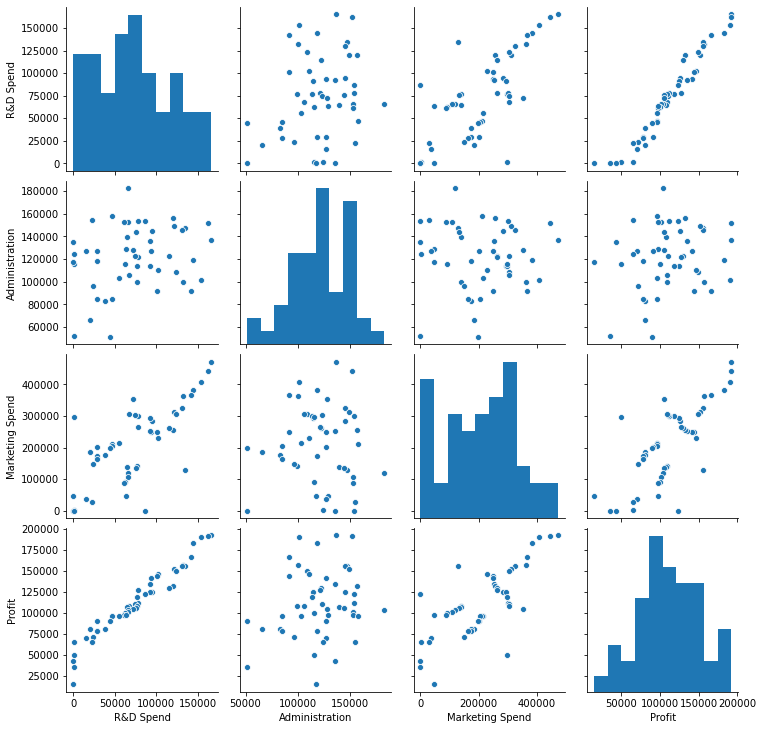

In [5]:
import seaborn as sns
sns.pairplot(startups)

In [12]:
startups1=startups.rename({'R&D Spend': 'RDSpend','Marketing Spend': 'MarketingSpend'}, axis=1)

In [13]:
import statsmodels.formula.api as smf
model1=smf.ols('MarketingSpend~RDSpend+Profit',data=startups1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         MarketingSpend   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     29.83
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           4.33e-09
Time:                        19:15:19   Log-Likelihood:                -635.66
No. Observations:                  50   AIC:                             1277.
Df Residuals:                      47   BIC:                             1283.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.127e+04   6.62e+04     -0.775      0.442   -1.84e+05    8.19e+04
RDSpend       -0.1621      1.116     -0.145      0.885      -2.406       2.082
Profit         2.4484      1.271      1.927      0.060      -0.108       5.004
==============================================================================
Omnibus:                        3.741   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.154   Jarque-Bera (JB):                3.178
Skew:                          -0.248   Prob(JB):                        0.204
Kurtosis:                       4.131   Cond. No.                     8.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
mrd_model=smf.ols('MarketingSpend~RDSpend',data=startups1).fit()
mrd_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         MarketingSpend   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     52.95
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           2.77e-09
Time:                        19:18:04   Log-Likelihood:                -637.56
No. Observations:                  50   AIC:                             1279.
Df Residuals:                      48   BIC:                             1283.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.878e+04    2.3e+04      2.995      0.004    2.26e+04    1.15e+05
RDSpend        1.9295      0.265      7.277      0.000       1.396       2.463
==============================================================================
Omnibus:                        3.201   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.221
Skew:                          -0.342   Prob(JB):                        0.329
Kurtosis:                       3.774   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
mp_model=smf.ols('MarketingSpend~Profit',data=startups1).fit()
mp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         MarketingSpend   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           4.38e-10
Time:                        19:22:11   Log-Likelihood:                -635.67
No. Observations:                  50   AIC:                             1275.
Df Residuals:                      48   BIC:                             1279.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -4.31e+04   3.46e+04     -1.247      0.219   -1.13e+05    2.64e+04
Profit         2.2687      0.291      7.803      0.000       1.684       2.853
==============================================================================
Omnibus:                        3.843   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.310
Skew:                          -0.255   Prob(JB):                        0.191
Kurtosis:                       4.152   Cond. No.                     3.54e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
rsq_hp=smf.ols('RDSpend~Administration+MarketingSpend+Profit',data=startups1).fit().rsquared
vif_hp = 1/(1-rsq_hp) # 16.33

rsq_wt = smf.ols('Profit~RDSpend+MarketingSpend+Administration',data=startups1).fit().rsquared
vif_wt = 1/(1-rsq_wt) # 564.9

rsq_vol = smf.ols('MarketingSpend~Profit+Administration+RDSpend',data=startups1).fit().rsquared  
vif_vol = 1/(1-rsq_vol) #  564.84

rsq_sp = smf.ols('Administration~Profit+MarketingSpend+RDSpend',data=startups1).fit().rsquared  
vif_sp = 1/(1-rsq_sp) #  16.35

In [19]:
d1 = {'Variables':['RDSpend','Profit','MarketingSpend','Administration'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,RDSpend,19.563001
1,Profit,20.302917
2,MarketingSpend,2.465332
3,Administration,1.182146


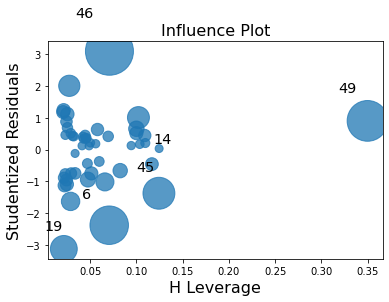

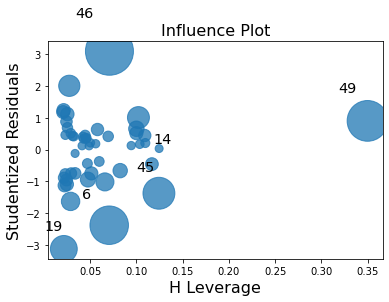

In [20]:
import statsmodels.api as sm
sm.graphics.influence_plot(model1)

In [21]:
startups1_new=startups1.drop(startups1.index[[49]],axis=0)

In [24]:
model2=smf.ols('MarketingSpend~RDSpend+Profit',data=startups1_new).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         MarketingSpend   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     28.09
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           1.07e-08
Time:                        19:31:42   Log-Likelihood:                -623.01
No. Observations:                  49   AIC:                             1252.
Df Residuals:                      46   BIC:                             1258.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.486e+04    8.2e+04     -1.157      0.253    -2.6e+05    7.02e+04
RDSpend       -0.7373      1.286     -0.573      0.569      -3.327       1.852
Profit         3.1995      1.520      2.104      0.041       0.139       6.260
==============================================================================
Omnibus:                        3.826   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.148   Jarque-Bera (JB):                3.642
Skew:                          -0.139   Prob(JB):                        0.162
Kurtosis:                       4.306   Cond. No.                     1.02e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

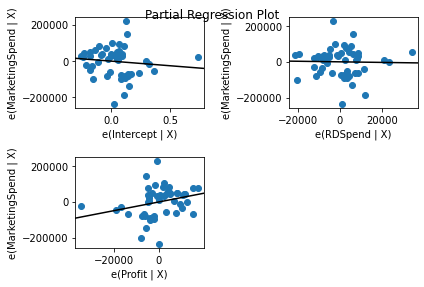

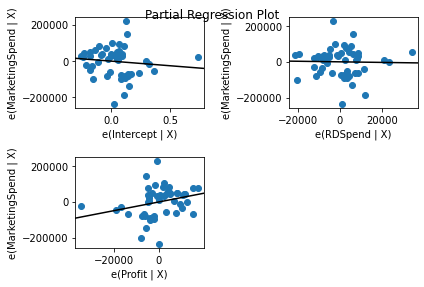

In [25]:
sm.graphics.plot_partregress_grid(model1)

In [38]:
final_ml=smf.ols('MarketingSpend~RDSpend',data=startups1).fit()
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         MarketingSpend   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     52.95
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           2.77e-09
Time:                        19:37:01   Log-Likelihood:                -637.56
No. Observations:                  50   AIC:                             1279.
Df Residuals:                      48   BIC:                             1283.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.878e+04    2.3e+04      2.995      0.004    2.26e+04    1.15e+05
RDSpend        1.9295      0.265      7.277      0.000       1.396       2.463
==============================================================================
Omnibus:                        3.201   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.221
Skew:                          -0.342   Prob(JB):                        0.329
Kurtosis:                       3.774   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

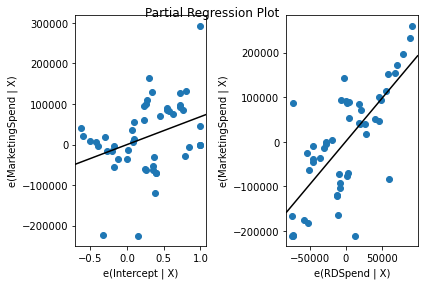

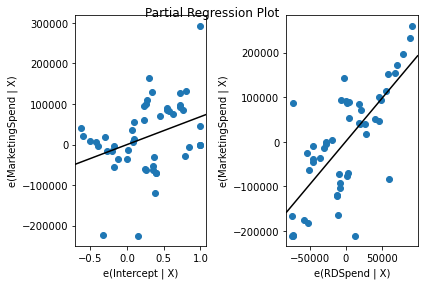

In [39]:
sm.graphics.plot_partregress_grid(final_ml)

In [40]:
mpg_pred=final_ml.predict(startups1_new)

Text(0, 0.5, 'fitted_values')

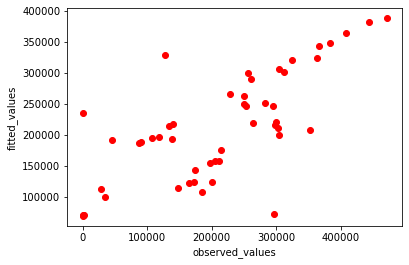

In [41]:
import matplotlib.pyplot as plt
plt.scatter(startups1_new.MarketingSpend,mpg_pred,c="r");plt.xlabel("observed_values");plt.ylabel("fitted_values")